In [52]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

**RED WINE QUALITY**

In [53]:
# Downloading red wine quality file
link='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
RED=pd.read_csv(link,sep=";")

In [54]:
# View Head of RED dataset
RED.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
# View Tail of RED dataset
RED.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [56]:
# Check DataTypes
print(RED.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


As everything is either int type or float type. Hence there is no need for **LabelEncoding** 

In [57]:
# Check for NULL Entries
RED.notnull().all()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

We found that there is no null entry.

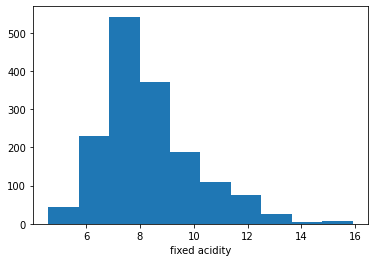

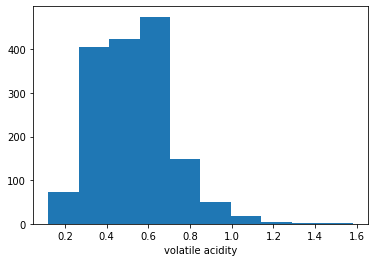

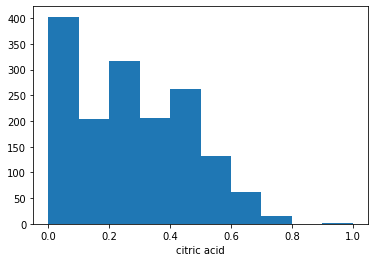

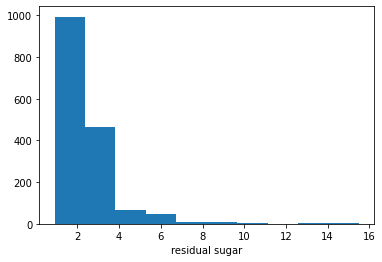

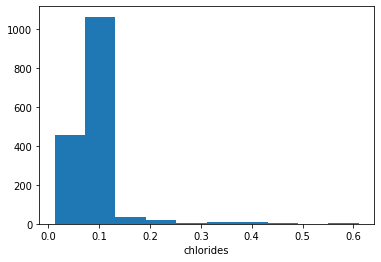

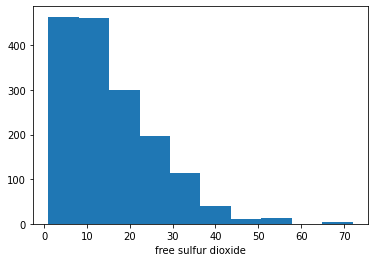

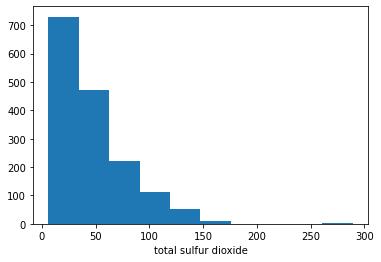

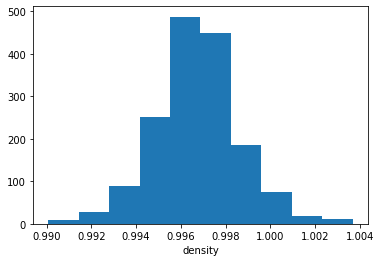

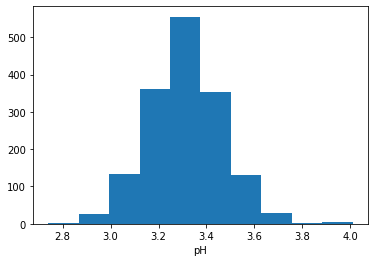

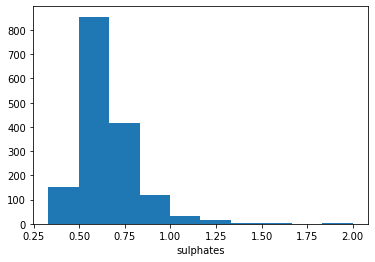

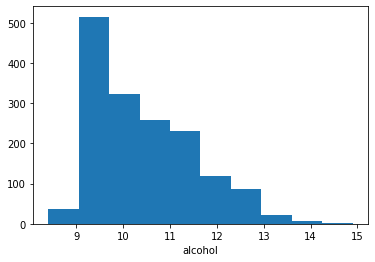

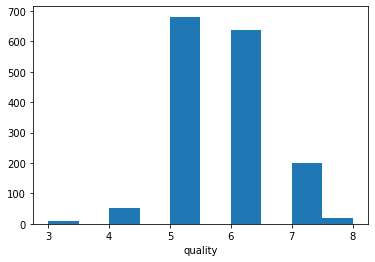

In [58]:
# Plot Histogram
for i in RED.columns.values:
  plt.hist(RED[i])
  plt.xlabel(i)
  plt.show()

We can see that all variables are continuous.But Quality is the only one that is discrete.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3cc4dea90>,
      dtype=object)

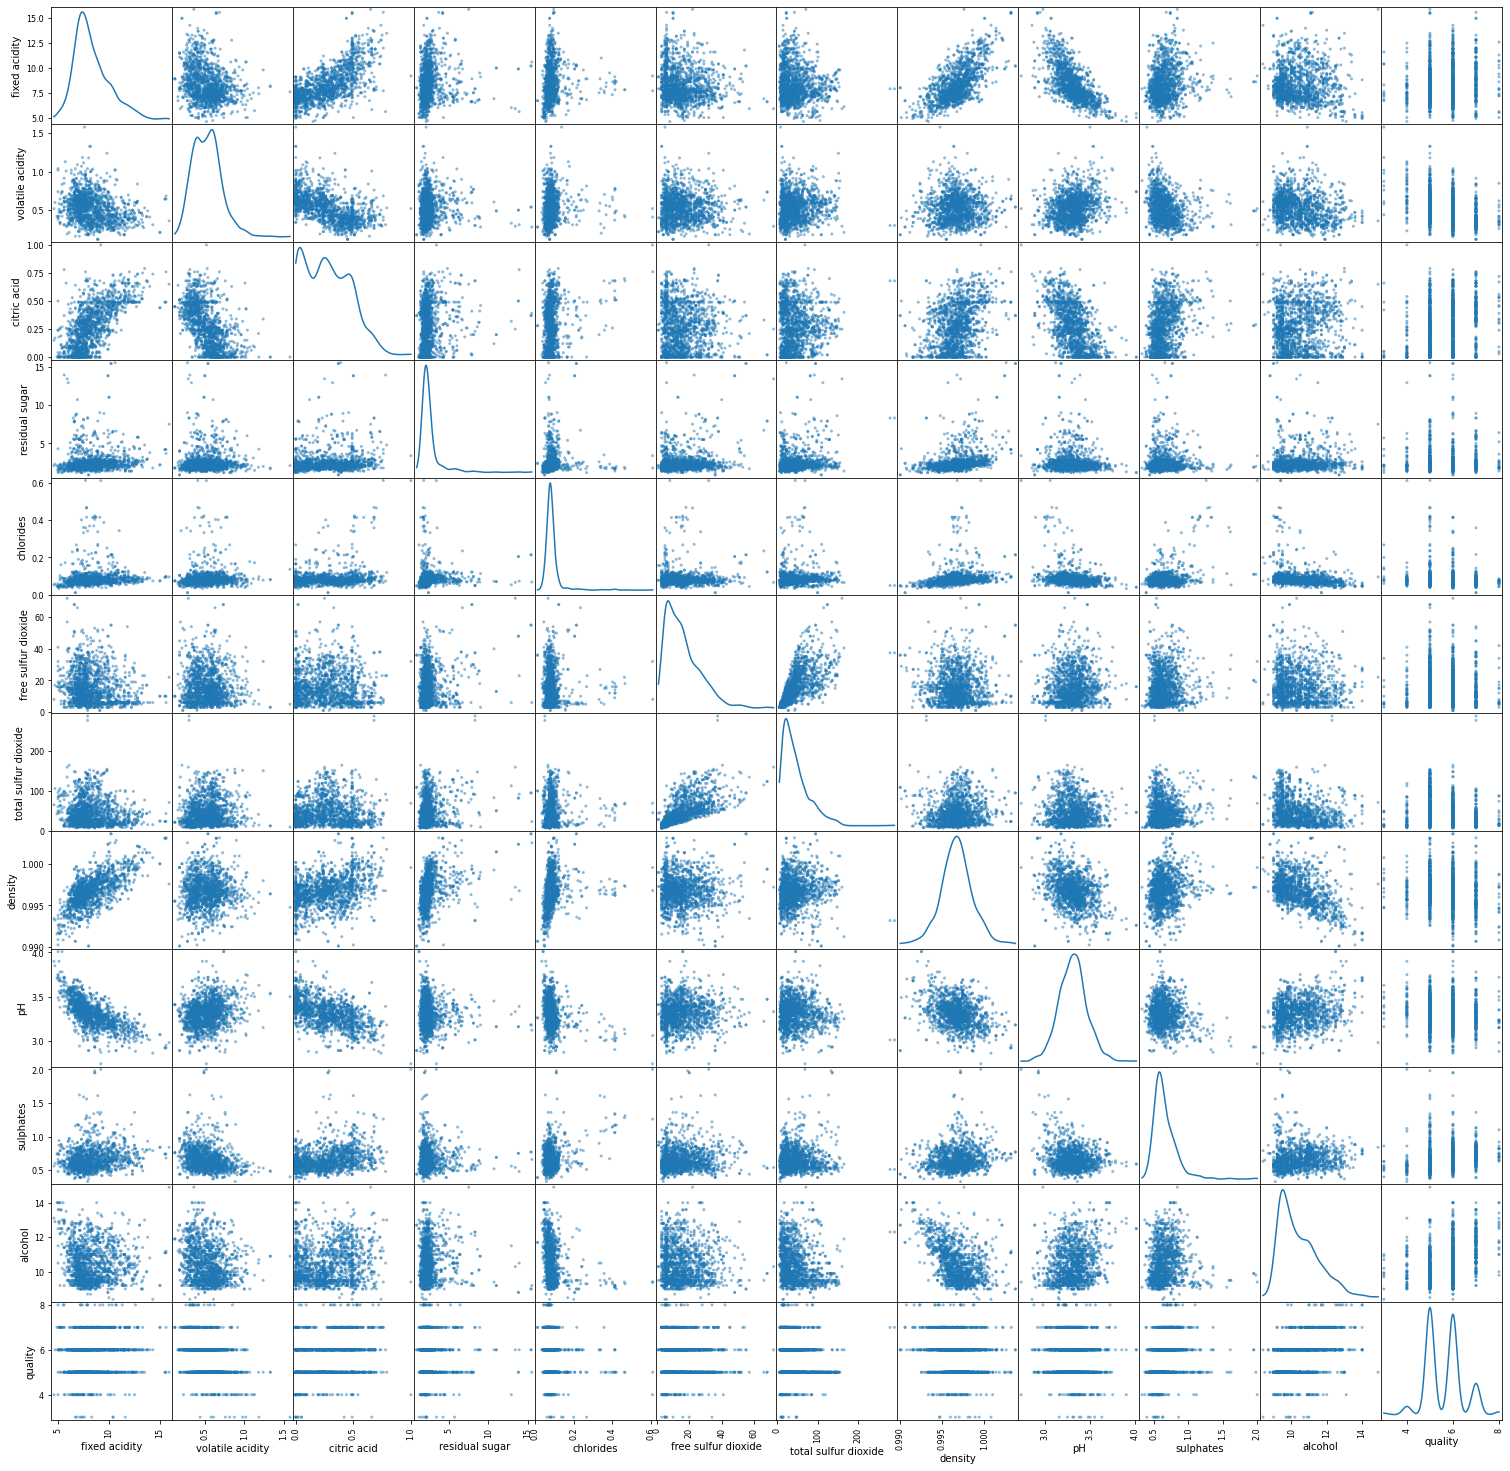

In [59]:
# Plot Pair Wise Scatter Matrix(DATA VISUALISATION)
pd.plotting.scatter_matrix(RED,alpha=0.5,figsize=(26,26),diagonal="kde")

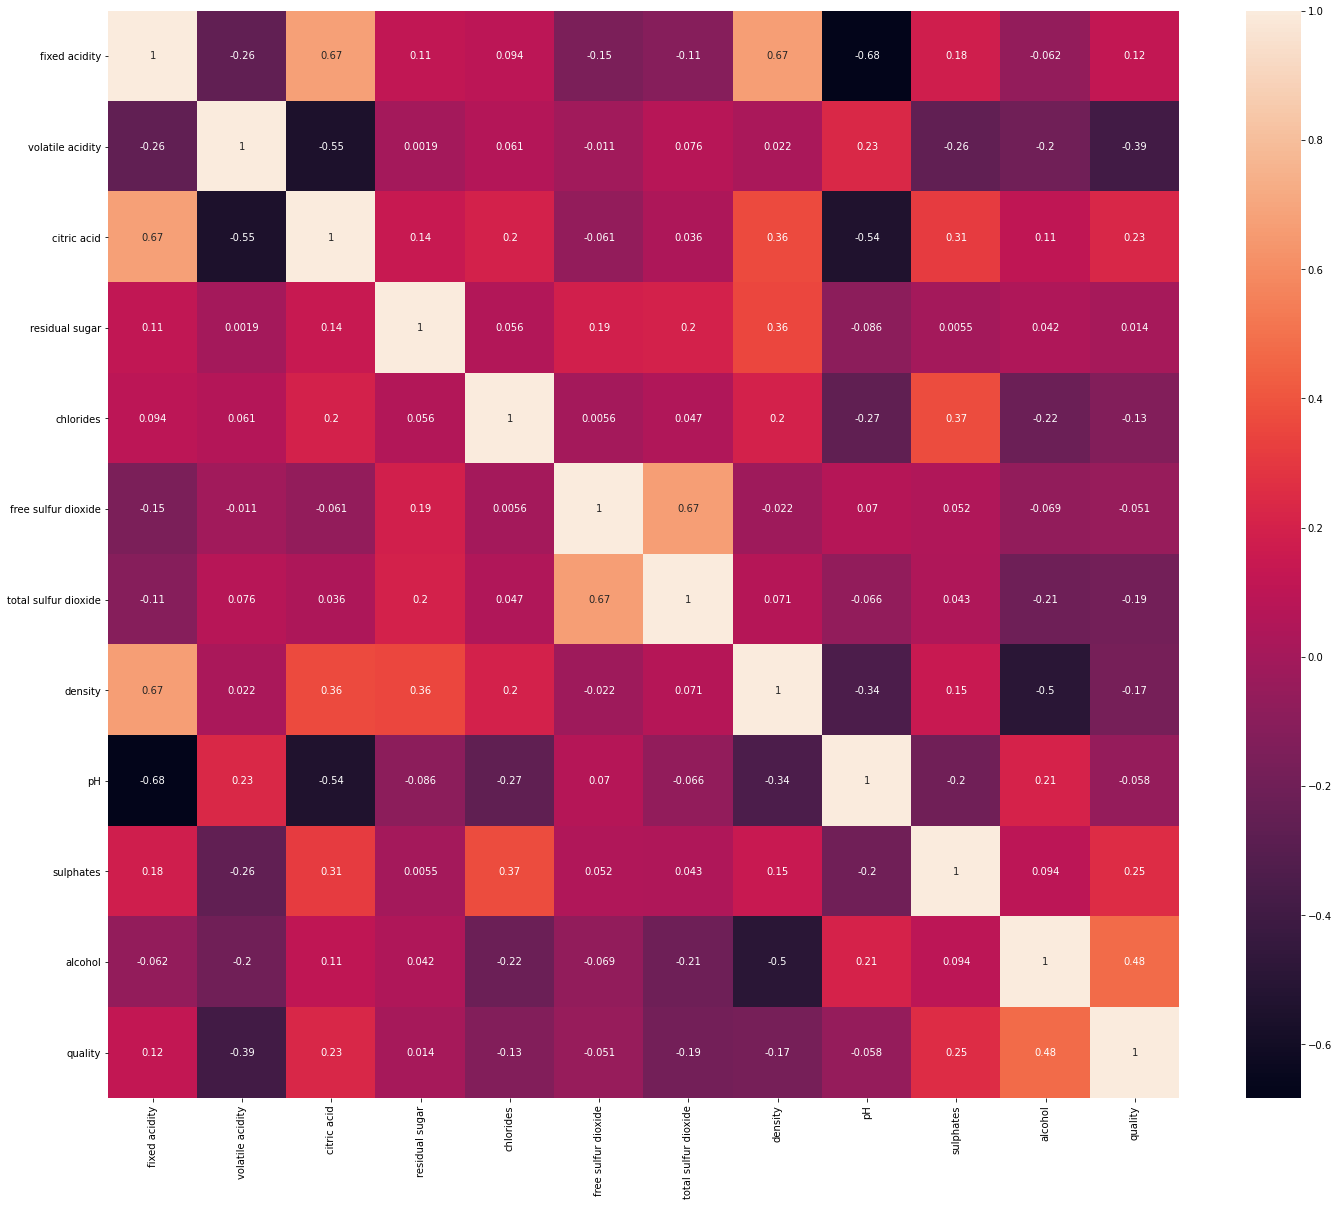

In [60]:
# Check Correlation using HeatMap
fig, az =plt.subplots(figsize=(24,20))
sns.heatmap(RED.corr(),annot=True)
plt.show()

We observe that the fetaures **residual sugar,free sulfur dixide and pH** have correlation with **quality** 0.014,(-0.051) and (-0.058) respectively. Hence We can drop these features to fit the model and make it less complex.

In [61]:
# Drop the less correaltion features ie [residual sugar,free sulfur dioxide and pH]
RED_new=RED.drop(["residual sugar","free sulfur dioxide", "pH"],axis=1)
RED_new.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

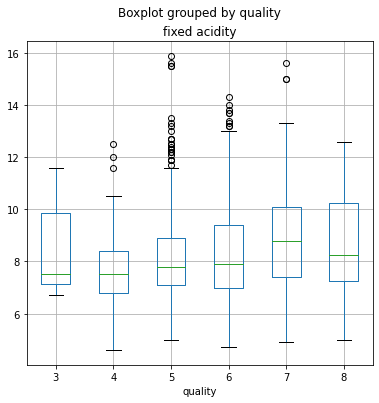

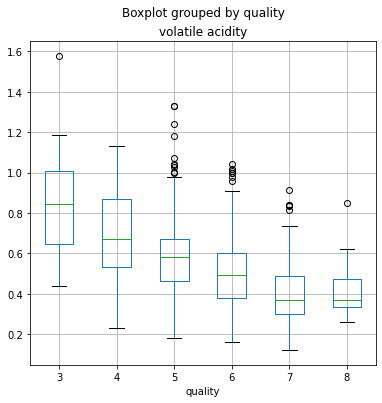

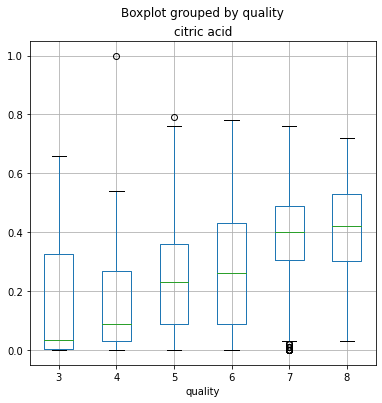

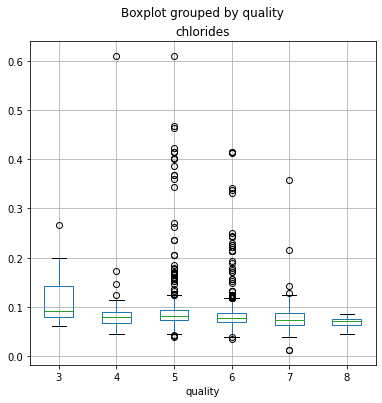

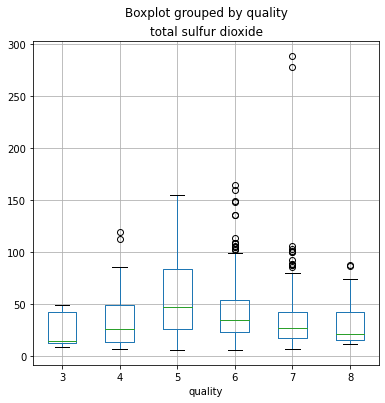

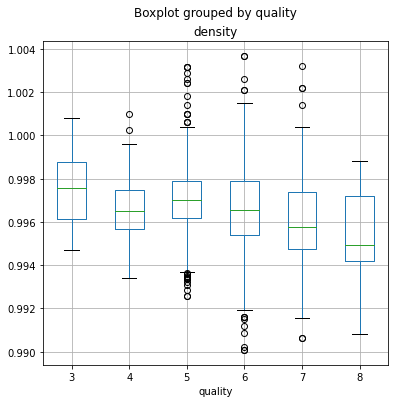

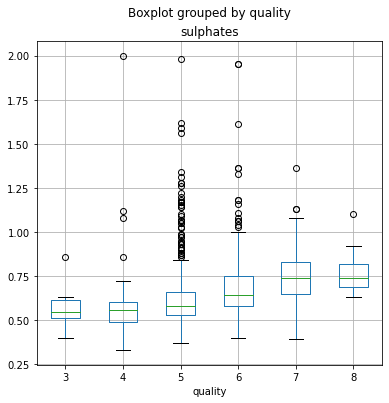

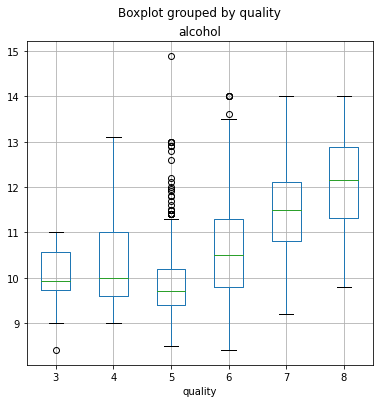

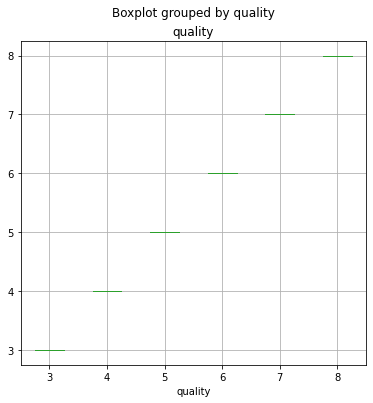

In [62]:
# Box Plot to check for Outliers
for i in RED_new.columns.values:
  RED_new.boxplot(column=i,by='quality',grid=True,figsize=(6,6))

Here we can see that all the dots ouside box plot are outliers.
Now we will try to remove these outliers.

In [63]:
# Z score to remove Outliers
# Definition of Z Score --> Z-score is the signed number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured.
from scipy import stats
z= np.abs(stats.zscore(RED_new))
print(z)
# Here you can see Z scores in output

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [64]:
# Setting Threshold for Z score
thres=3
print(np.where(z>3))
# In the output first array is lis of row numbers and second is respective column numbers for Outliers

(array([  13,   15,   17,   17,   19,   38,   42,   43,   81,   81,   83,
         86,   88,   91,   92,  106,  106,  109,  120,  126,  127,  142,
        144,  147,  151,  151,  151,  169,  169,  181,  199,  226,  226,
        240,  243,  244,  258,  258,  281,  291,  339,  340,  347,  354,
        374,  381,  391,  442,  442,  451,  459,  467,  480,  515,  517,
        544,  554,  554,  555,  555,  557,  557,  568,  588,  591,  608,
        614,  636,  639,  649,  651,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  723,  724,  730,  754,  776,  777,  795,  821,
        832,  836,  837,  889,  899, 1017, 1018, 1051, 1051, 1079, 1081,
       1114, 1165, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1299,
       1299, 1312, 1319, 1319, 1367, 1370, 1370, 1372, 1372, 1374, 1374,
       1434, 1435, 1469, 1474, 1476, 1478, 1493, 1496, 1505, 1558, 1570]), array([6, 4, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 6, 6, 6, 3, 6, 4, 1, 1, 1, 7,
       7, 3, 2, 3, 6, 3, 6, 3, 1, 3, 6, 3, 0, 0,

In [65]:
# Removing Outliers  (Here RED_new2 is dataframe after removing outliers)
RED_new2=RED_new[(z<3).all(axis=1)]
RED_new2.describe()
# After removing outliers we will have count=1491 but before that it was 1599. Hence we can say that 108 outlers are removed.

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,8.278940,0.523585,0.263575,0.081450,44.661301,0.996716,0.641985,10.426358,5.657277
std,1.655671,0.168607,0.190693,0.021241,30.055044,0.001740,0.129649,1.031309,0.780582
min,4.600000,0.120000,0.000000,0.034000,6.000000,0.991500,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,0.070000,22.000000,0.995600,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.079000,37.000000,0.996700,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,0.089000,60.000000,0.997800,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,0.226000,145.000000,1.002200,1.160000,13.600000,8.000000


WE have successfully removed 108 outliers from our data.

In [66]:
# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
X=RED_new2.drop(["quality"],axis=1)
Y=RED_new2["quality"]

In [67]:
# Split Data in to Train and Test part with 4:1 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=25,shuffle=True)

In [68]:
# ***********PREPROCESSING*************
# Scaling the columns to set zero mean and unit variance
from sklearn import preprocessing
scaler=preprocessing.StandardScaler() 
scaler.fit(X_train) 
# Transforming Training Data only X not Y 
train_X=pd.DataFrame(scaler.transform(X_train)) 
train_Y=pd.DataFrame(Y_train)
# Transforming Testing Data only X not Y 
test_X=pd.DataFrame(scaler.transform(X_test)) 
test_Y=pd.DataFrame(Y_test)


**TRAINING and VALIDATION OF THE MODEL (RED WINE)**
1. Using L1 regularised regression(MODEL1)

In [69]:
# IMPORT ML LIBRARIES
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score



# ****************LASSO******************
# To Check for Best Value of Alpha
Cross_Val = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
grid = dict()
grid['alpha'] = np.arange(0.01, 1, 0.01)
GrSearch = GridSearchCV(Lasso(), grid, scoring='neg_mean_absolute_error', cv=Cross_Val, n_jobs=-1)

# FITTING
Model1 = GrSearch.fit(train_X,train_Y)
# PREDICTION
Y1 = Model1.predict(test_X)

print("Mean Absolute Error: " +str(mean_absolute_error(test_Y, Y1)),"\n"+"R_2 score is : "+str(r2_score(test_Y, Y1)))

Mean Absolute Error: 0.5030055573798152 
R_2 score is : 0.32936268493048215


**We get Mean Absolute Error of 0.503 for L1 regularised regression**


2. L2 Regularised Regression

In [70]:
# Import ML libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# *************RIDGE REGRESSION******************
# Set Alpha value
Cross_Val = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
grid = dict()
grid['alpha'] = np.arange(0.01, 0.2, 0.1)
GrSearch = GridSearchCV(Ridge(), grid, scoring='neg_mean_squared_error', cv=Cross_Val, n_jobs=-1)

# FITTING
Model2 = GrSearch.fit(train_X,train_Y)
# PREDICTION
Y2 = Model2.predict(test_X)
# summarize
print("Mean_squared_error: " +str(mean_squared_error(test_Y, Y2)),"\n"+"R_2 score is : "+str(r2_score(test_Y, Y2)))

Mean_squared_error: 0.39817878558924186 
R_2 score is : 0.32439586998550374


**WE get the Mean Absolute Error of 0.398 for L2 Regularised regression**

3. Random Forest 

In [71]:
# Importing ML Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score

# FITTING Model
Model3= RandomForestRegressor(n_estimators=100)
Model3.fit(train_X,train_Y)
# PREDICTION
Y3=Model3.predict(test_X)

print("Mean_absolute_error: " +str(mean_absolute_error(test_Y, Y3)),"\n"+"R_2 score is : "+str(r2_score(test_Y, Y3)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean_absolute_error: 0.4108026755852842 
R_2 score is : 0.46799507117100014


**WE get Mean Absolute Error of 0.4075 for Random Forest Model**

Text(0.5, 0, 'Random Forest Feature Importance')

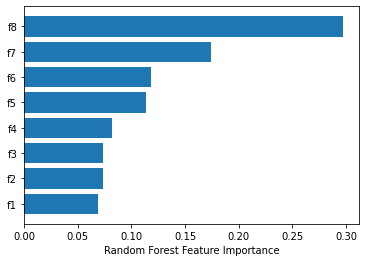

In [72]:
# Check for Feature Importance in Random Forest Model.Here f1 f2 f3 are feature 1 2 and 3 respectively
Model3.feature_importances_
sorted_idx = Model3.feature_importances_.argsort()
plt.barh(["f1","f2","f3","f4","f5","f6","f7","f8"],Model3.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**WHITE WINE QUALITY**

In [73]:
# Downloading White wine quality file
link='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
WHITE=pd.read_csv(link,sep=";")

In [74]:
# View Head of White dataset
WHITE.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
# View Tail of WHITE dataset
WHITE.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [76]:
# Check DataTypes
print(WHITE.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


As everything is either int type or float type. Hence there is no need for **LabelEncoding** 

In [77]:
# Check for NULL Entries
WHITE.notnull().all()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

We found that there is no null entry.

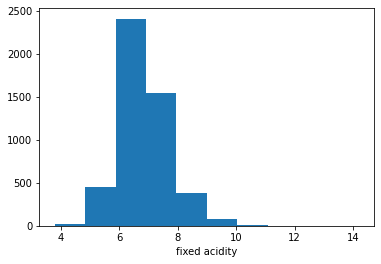

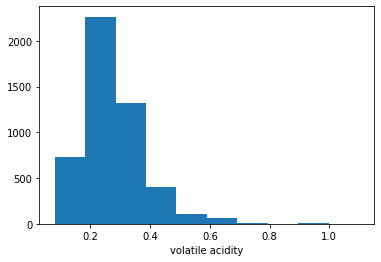

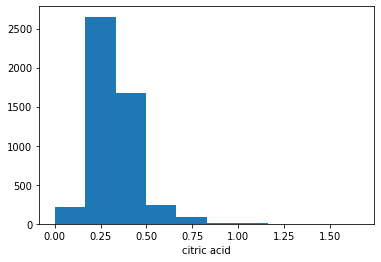

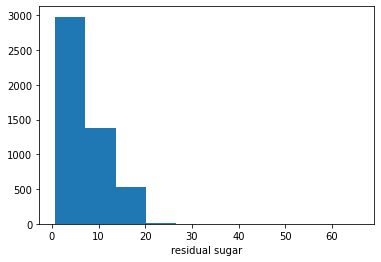

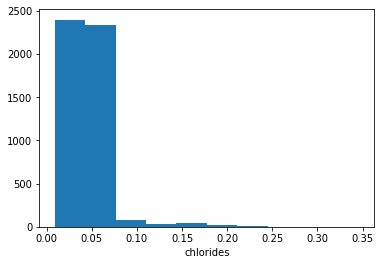

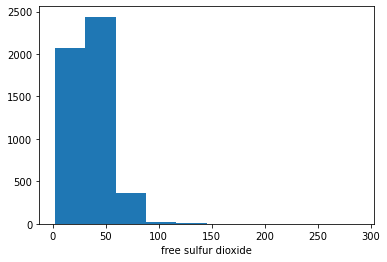

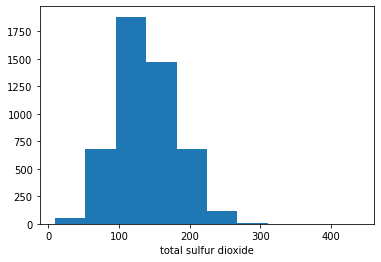

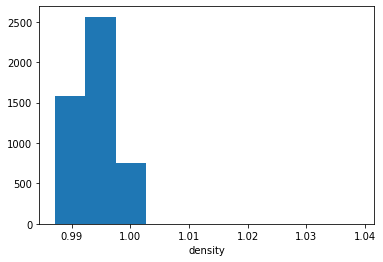

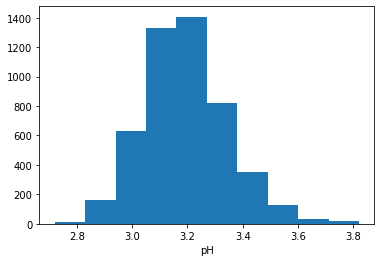

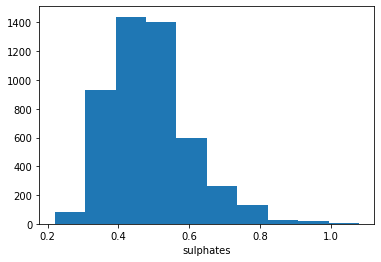

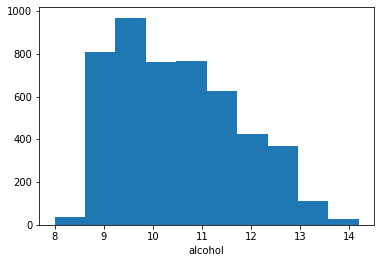

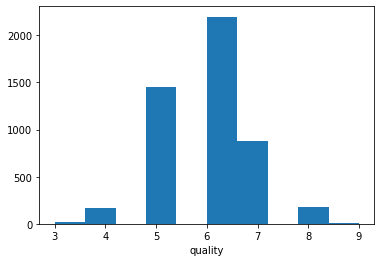

In [78]:
# Plot Histogram
for i in WHITE.columns.values:
  plt.hist(WHITE[i])
  plt.xlabel(i)
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3d58af320>,
      dtype=object)

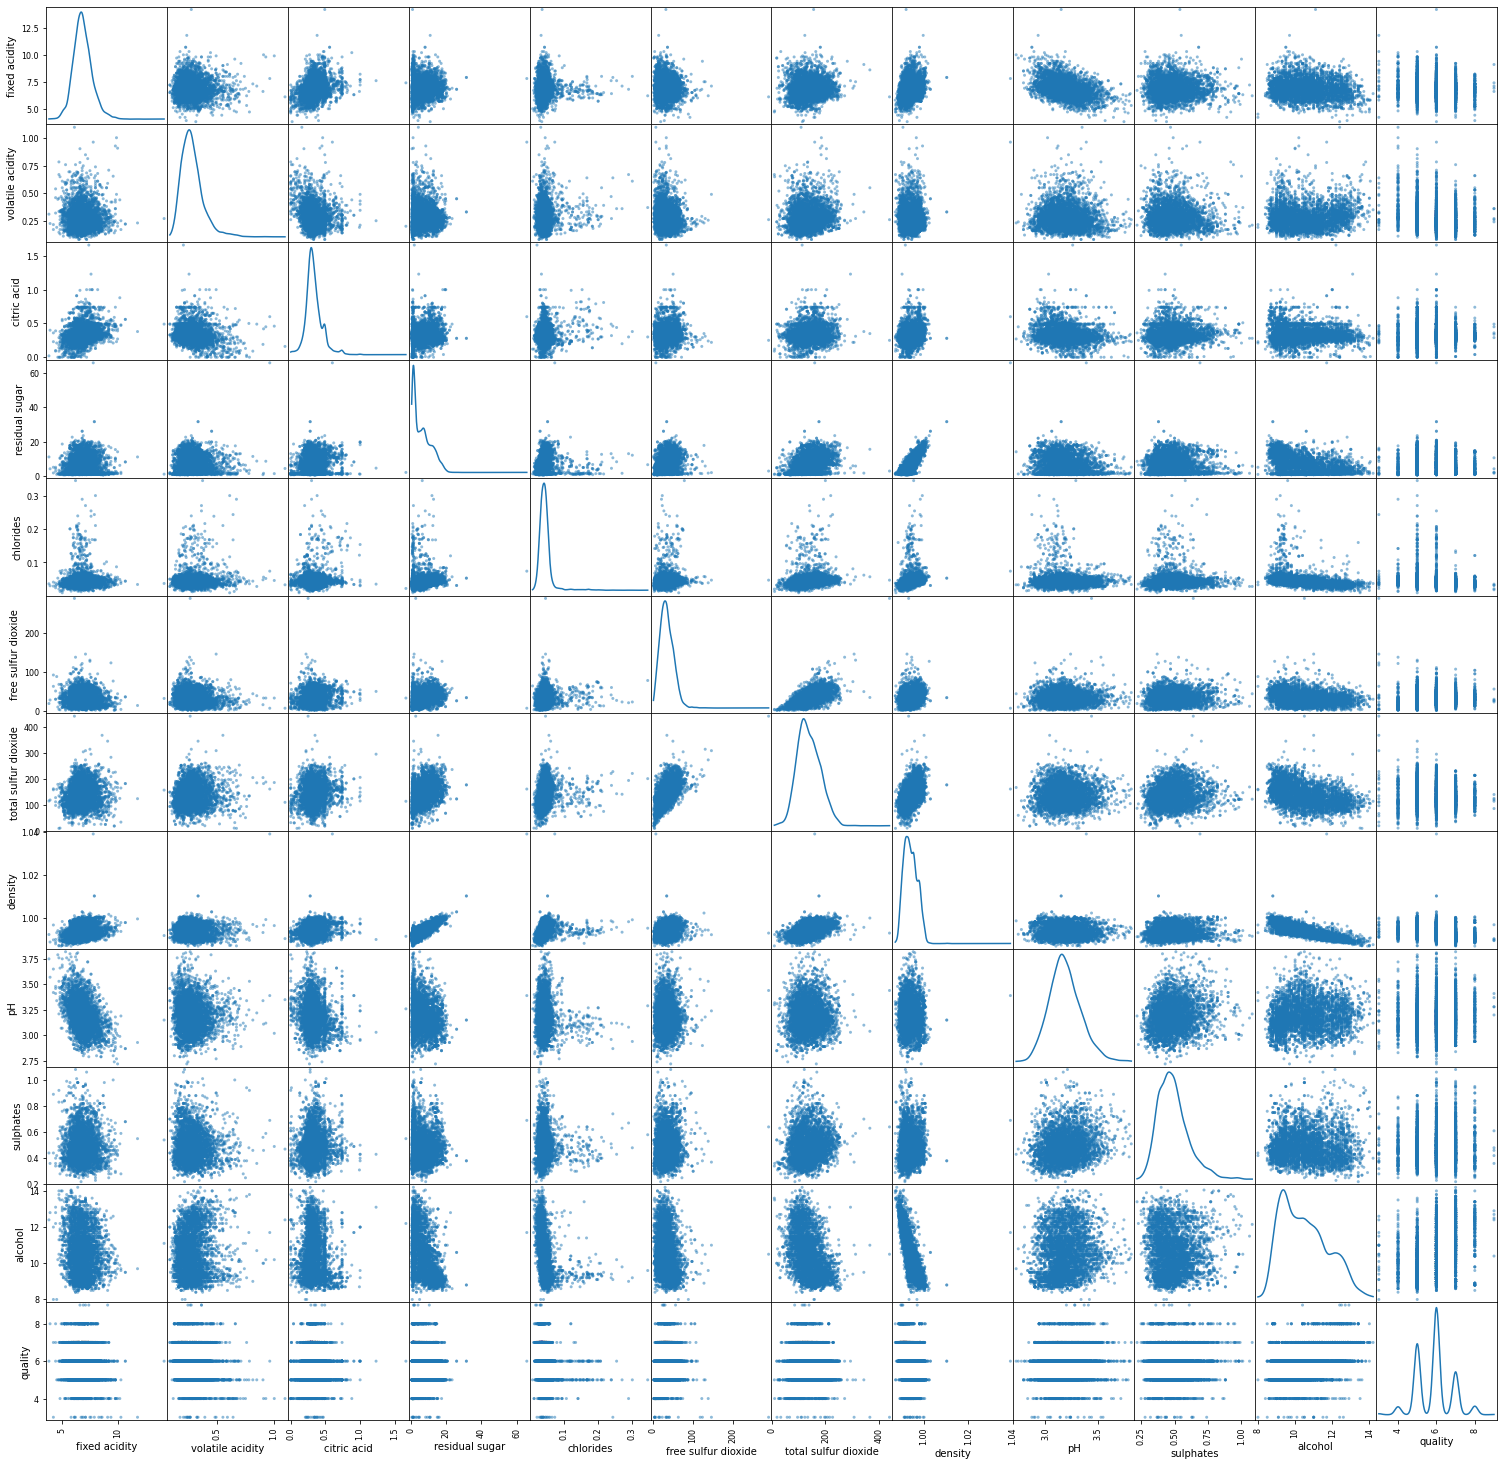

In [79]:
# Plot Pair Wise Scatter Matrix(DATA VISUALISATION)
pd.plotting.scatter_matrix(WHITE,alpha=0.5,figsize=(26,26),diagonal="kde")

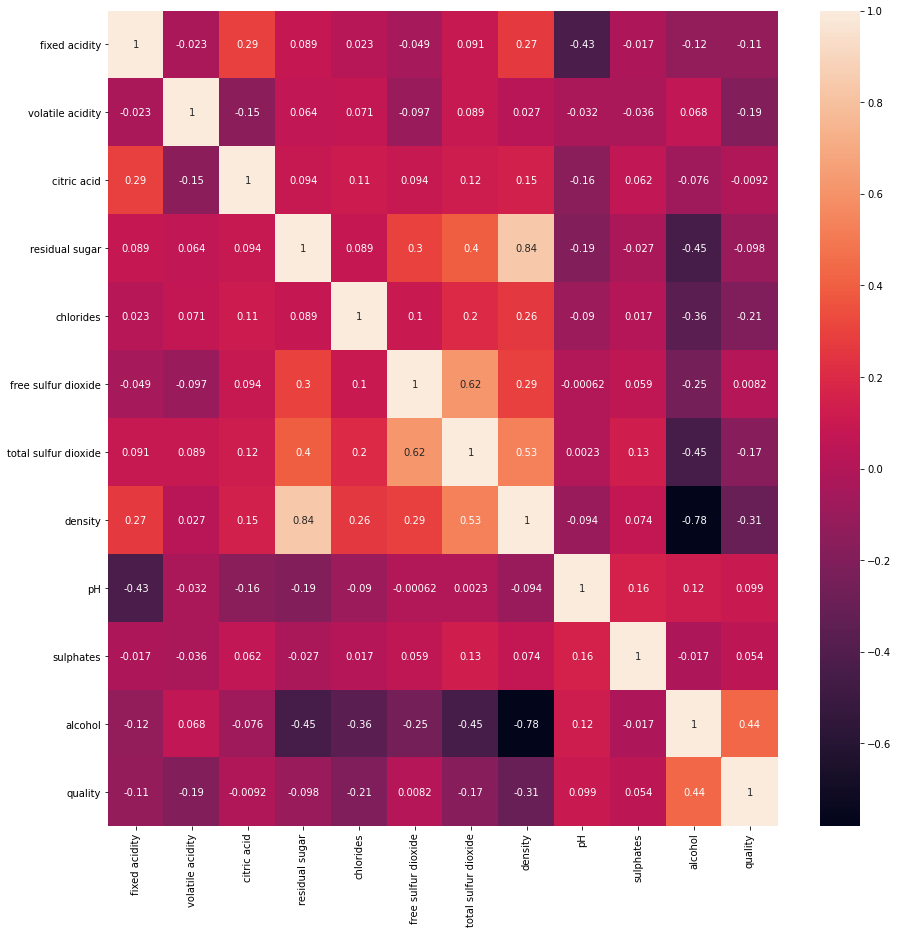

In [80]:
# Check Correlation using HeatMap
fig, az =plt.subplots(figsize=(15,15))
sns.heatmap(WHITE.corr(),annot=True)
plt.show()

We observe that the fetaures **citric acid,residual sugar,free sulfur dixide,pH,sulphates** have almost zero correlation with quality. Hence We can drop these features to fit the model and make it less complex.

In [81]:
# Drop the less correaltion features ie [citric acid,residual sugar,free sulfur dioxide, pH and sulphates]
WHITE_new=WHITE.drop(["citric acid","residual sugar","free sulfur dioxide", "pH","sulphates"],axis=1)
WHITE_new.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,alcohol,quality
0,7.0,0.27,0.045,170.0,1.0010,8.8,6
1,6.3,0.30,0.049,132.0,0.9940,9.5,6
2,8.1,0.28,0.050,97.0,0.9951,10.1,6
3,7.2,0.23,0.058,186.0,0.9956,9.9,6
4,7.2,0.23,0.058,186.0,0.9956,9.9,6


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

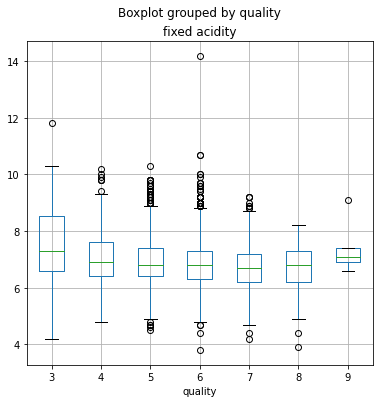

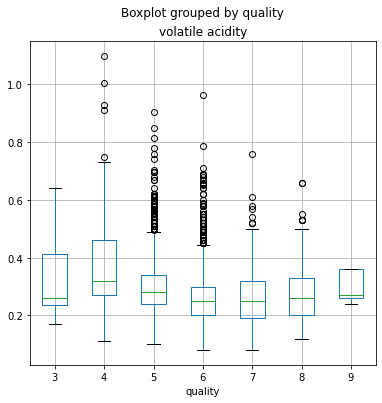

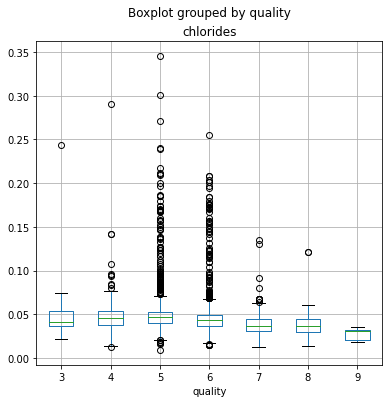

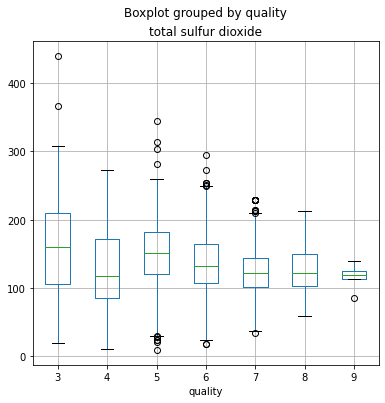

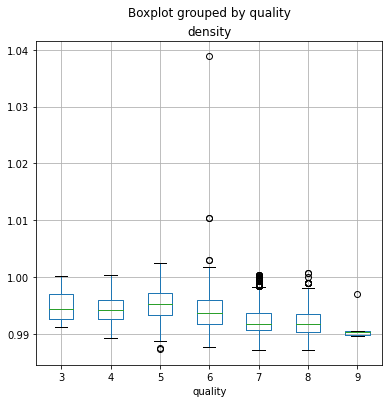

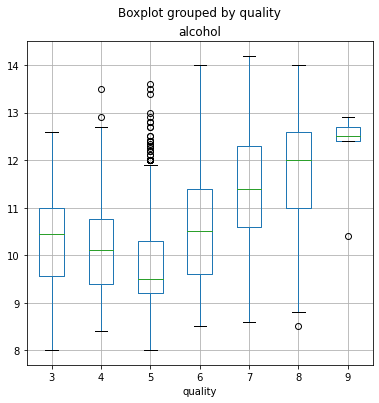

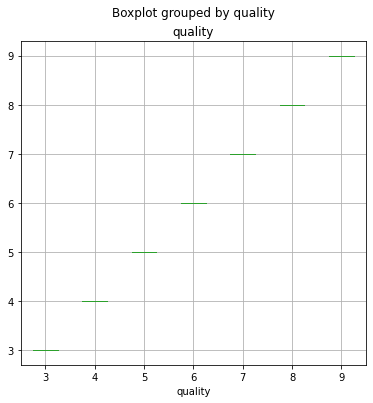

In [82]:
# Box Plot to check for Outliers
for i in WHITE_new.columns.values:
  WHITE_new.boxplot(column=i,by='quality',grid=True,figsize=(6,6))

Here we can see that all the dots ouside box plot are outliers. Now we will try to remove these outliers.

In [83]:
# Z score to remove Outliers
# Definition of Z Score --> Z-score is the signed number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured.
from scipy import stats
z= np.abs(stats.zscore(WHITE_new))
print(z)
# Here you can see Z scores in output

[[0.17209696 0.0817699  0.035355   ... 2.33151201 1.39315246 0.13787014]
 [0.65750113 0.21589563 0.14774708 ... 0.00915417 0.82427568 0.13787014]
 [1.4757511  0.01745194 0.1935226  ... 0.3586648  0.33666701 0.13787014]
 ...
 [0.4204731  0.37943543 0.21845708 ... 0.49735026 0.90554379 0.13787014]
 [1.60561323 0.11667379 1.08819196 ... 1.78471666 1.85757201 1.2671142 ]
 [1.01304317 0.67710097 1.179743   ... 1.54396243 1.04489089 0.13787014]]


In [84]:
# Setting Threshold for Z score
thres=3
print(np.where(z>3))
# In the output first array is lis of row numbers and second is respective column numbers for Outliers

(array([  17,   20,   23,   40,   41,   54,   98,  147,  169,  178,  194,
        195,  196,  207,  221,  227,  230,  251,  253,  268,  269,  271,
        294,  294,  315,  325,  358,  372,  445,  450,  484,  508,  525,
        531,  600,  683,  687,  687,  729,  740,  771,  772,  774,  775,
        820,  821,  827,  859,  873,  873,  876,  877,  878,  926,  948,
        979,  980, 1029, 1034, 1034, 1034, 1040, 1051, 1053, 1123, 1124,
       1152, 1158, 1163, 1171, 1178, 1180, 1214, 1217, 1217, 1228, 1229,
       1239, 1245, 1254, 1263, 1272, 1304, 1307, 1309, 1312, 1369, 1369,
       1372, 1373, 1401, 1417, 1417, 1423, 1476, 1484, 1496, 1526, 1551,
       1577, 1580, 1598, 1599, 1605, 1638, 1653, 1663, 1672, 1673, 1688,
       1708, 1714, 1728, 1744, 1758, 1759, 1790, 1801, 1835, 1836, 1839,
       1856, 1856, 1865, 1900, 1925, 1926, 1931, 1931, 1932, 1951, 1951,
       1961, 2024, 2025, 2026, 2030, 2050, 2050, 2083, 2092, 2127, 2154,
       2154, 2162, 2186, 2257, 2259, 2266, 2279, 2

In [85]:
# Removing Outliers  (Here RED_new2 is dataframe after removing outliers)
WHITE_new2=WHITE_new[(z<3).all(axis=1)]
WHITE_new2.describe()
# After removing outliers we will have count=4651 but before that it was 4898. Hence we can say that 274 outlers are removed.

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,alcohol,quality
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000
mean,6.835401,0.270842,0.043197,138.094496,0.993998,10.534762,5.912707
std,0.790950,0.086147,0.011673,41.290748,0.002921,1.226796,0.855163
min,4.400000,0.080000,0.012000,21.000000,0.987110,8.000000,4.000000
25%,6.300000,0.210000,0.036000,108.000000,0.991700,9.500000,5.000000
50%,6.800000,0.260000,0.043000,134.000000,0.993700,10.400000,6.000000
75%,7.300000,0.320000,0.050000,167.000000,0.996135,11.400000,6.000000
max,9.300000,0.580000,0.110000,260.000000,1.002950,14.200000,8.000000


WE have successfully removed 274 outliers from our data.

In [86]:
# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
Xw=WHITE_new2.drop(["quality"],axis=1)
Yw=WHITE_new2["quality"]

In [87]:
# Split Data in to Train and Test part with 4:1 ratio
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, Yw_train, Yw_test = train_test_split(Xw,Yw,train_size=0.8,test_size=0.2,random_state=25,shuffle=True)

In [88]:
# ***********PREPROCESSING*************
# Scaling the columns to set zero mean and unit variance
from sklearn import preprocessing
scaler=preprocessing.StandardScaler() 
scaler.fit(Xw_train) 
# Transforming Training Data only Xw not Yw 
train_Xw=pd.DataFrame(scaler.transform(Xw_train)) 
train_Yw=pd.DataFrame(Yw_train)
# Transforming Testing Data only Xw not Yw 
test_Xw=pd.DataFrame(scaler.transform(Xw_test)) 
test_Yw=pd.DataFrame(Yw_test)

**TRAINING and VALIDATION OF THE MODEL (WHITE WINE)**
1. Using L1 regularised regression(MODEL4)

In [89]:
# IMPORT ML LIBRARIES
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score



# ****************LASSO******************
# To Check for Best Value of Alpha
Cross_Val = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
grid = dict()
grid['alpha'] = np.arange(0.01, 1, 0.01)
GrSearch = GridSearchCV(Lasso(), grid, scoring='neg_mean_absolute_error', cv=Cross_Val)

# FITTING
Model4 = GrSearch.fit(train_Xw,train_Yw)
# PREDICTION
Y4 = Model4.predict(test_Xw)

print("Mean Absolute Error: " +str(mean_absolute_error(test_Yw, Y4)),"\n"+"R_2 score is : "+str(r2_score(test_Yw, Y4)))

Mean Absolute Error: 0.5938563331396935 
R_2 score is : 0.22898694322420954


**We get Mean Absolute Error of 0.593 for L1 regularised regression**

2. L2 Regularised Regression

In [90]:
# Import ML libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# *************RIDGE REGRESSION******************
# Set Alpha value
Cross_Val = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
grid = dict()
grid['alpha'] = np.arange(0.01, 0.2, 0.1)
GrSearch = GridSearchCV(Ridge(), grid, scoring='neg_mean_squared_error', cv=Cross_Val, n_jobs=-1)

# FITTING
Model5 = GrSearch.fit(train_Xw,train_Yw)
# PREDICTION
Y5 = Model5.predict(test_Xw)
# summarize
print("Mean_squared_error: " +str(mean_squared_error(test_Yw, Y5)),"\n"+"R_2 score is : "+str(r2_score(test_Yw, Y5)))

Mean_squared_error: 0.5618135196486961 
R_2 score is : 0.2312993137859901


**We get Mean Absolute Error of 0.561 for L2 regularised regression.**

3. RANDOM FOREST

In [91]:
# Importing ML Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# FITTING Model
Model6= RandomForestRegressor()
Model6.fit(train_Xw,train_Yw)
# PREDICTION
Y6=Model6.predict(test_Xw)

print("Mean_absolute_error: " +str(mean_absolute_error(test_Yw, Y6)),"\n"+"R_2 score is : "+str(r2_score(test_Yw, Y6)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean_absolute_error: 0.43883995703544576 
R_2 score is : 0.4976313524299033


**We get Mean Absolute Error of 0.442 for Random Forest.**

Text(0.5, 0, 'Random Forest Feature Importance')

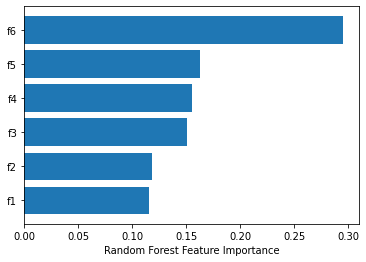

In [92]:
# Check for Feature Importance in Random Forest Model. Here f1 f2 f3 are feature 1 2 and 3 respectively
Model6.feature_importances_
sorted_idx = Model6.feature_importances_.argsort()
plt.barh(["f1","f2","f3","f4","f5","f6"],Model6.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


From R2_SCORE and MEAN ABSOLUTE ERROR analysis, We conclude that Random Forest Model was best for both RED and WHITE wine DataSet.
Here MODEL 1,2 and 3 are for RED WINE and MODEL 4,5,6 are for WHITE WINE.
Now we will test MEAN ABSOLUE ERROR or R2 SCORE for WHITE WINE USING RED WINE MODEL and VICE VERSA.

In [93]:
# PREDICTING WHITE WINE QUALITY USING RED WINE MODEL 3 and Calculation of MAE 
test_full_Yw=WHITE["quality"]
test_full_Xw=WHITE.drop(["residual sugar","free sulfur dioxide", "pH","quality"],axis=1)
Y7=Model3.predict(test_full_Xw)
print("MAE FOR WHITE USING RED's MODEL3: "+str(mean_absolute_error(Y7,test_full_Yw)))

MAE FOR WHITE USING RED's MODEL3: 0.7040710494079216


In [94]:
# PREDICTING RED WINE QUALITY USING WHITE WINE MODEL 6 and Calculation of MAE and R2 Score
test_full_Y=RED["quality"]
test_full_X=RED.drop(["citric acid","residual sugar","free sulfur dioxide", "pH","sulphates","quality"],axis=1)
Y8=Model6.predict(test_full_X)
print("MAE FOR WHITE USING RED's MODEL6: "+str(mean_absolute_error(Y8,test_full_Y)))

MAE FOR WHITE USING RED's MODEL6: 0.9841525953721078


Here We observe that while predicting the wine quality of Red Wine using White win's model, We get MAE of 1 and We get MAE of 0.73 for Vice Versa.
**Hence We cannot use RED's MODEL for WHITE and VICE VERSA**